In [3]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [5]:
df=pd.read_excel('Raisin_Dataset.xlsx')
print(df.head())
print(df.shape)
print(df.isnull().sum())

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
(900, 8)
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64


### model evaluation using kernel'rbf'

In [10]:
model_rbf=SVC(kernel='rbf')
df['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [13]:
X=df.drop('Class',axis=1)
y=df['Class']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
model_rbf.fit(X_train,y_train)
y_pred_rbf=model_rbf.predict(X_test)
report=classification_report(y_test,y_pred_rbf)
print(report)
print(model_rbf.n_iter_)

              precision    recall  f1-score   support

       Besni       0.86      0.83      0.84       129
     Kecimen       0.85      0.87      0.86       141

    accuracy                           0.85       270
   macro avg       0.85      0.85      0.85       270
weighted avg       0.85      0.85      0.85       270

[203]


[[107  22]
 [ 18 123]]


<Axes: >

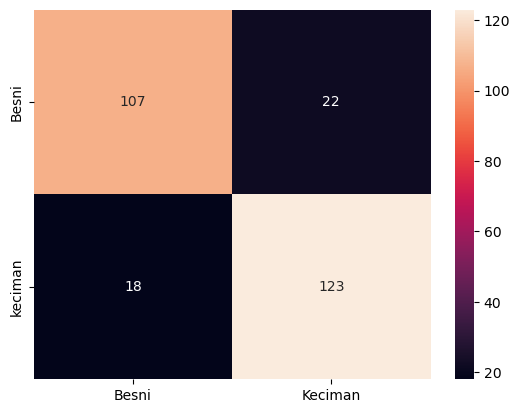

In [16]:
cm_rbf=confusion_matrix(y_test,y_pred_rbf)
print(cm_rbf)
sns.heatmap(cm_rbf,xticklabels=['Besni','Keciman'],yticklabels=['Besni','keciman'],annot=True,fmt='d')

### model evaluation and training using kernel'linear'

              precision    recall  f1-score   support

       Besni       0.81      0.88      0.84       129
     Kecimen       0.88      0.81      0.84       141

    accuracy                           0.84       270
   macro avg       0.85      0.85      0.84       270
weighted avg       0.85      0.84      0.84       270

[[114  15]
 [ 27 114]]


<Axes: >

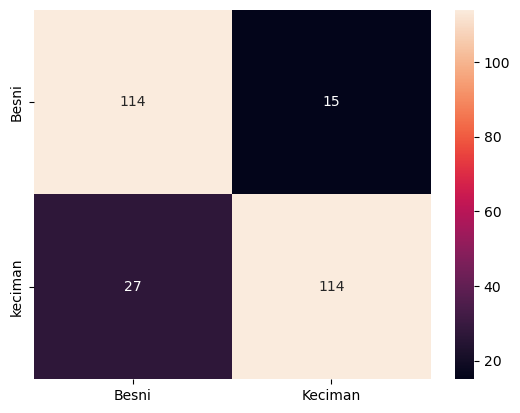

In [21]:
model_linear=SVC(kernel='linear')
model_linear.fit(X_train,y_train)
y_pred_linear=model_linear.predict(X_test)
report_1=classification_report(y_test,y_pred_linear)
print(report_1)
cm_linear=confusion_matrix(y_test,y_pred_linear)
print(cm_linear)
sns.heatmap(cm_linear,xticklabels=['Besni','Keciman'],yticklabels=['Besni','keciman'],annot=True,fmt='d')

In [23]:
model_linear.n_iter_

array([73239913], dtype=int32)

In [28]:
# no.of iterations in linear is so much higher
# lets do scsling

### Data preprocessing: Feature Engineering (Scaling)

In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Scaler=StandardScaler()
Scaler.fit(X)
X_train_Scaler=Scaler.fit_transform(X_train)
X_test_Scaler=Scaler.transform(X_test)

### Model Training AND EValuation : With scaled data using RBF kernel

              precision    recall  f1-score   support

       Besni       0.87      0.86      0.86       129
     Kecimen       0.87      0.88      0.88       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



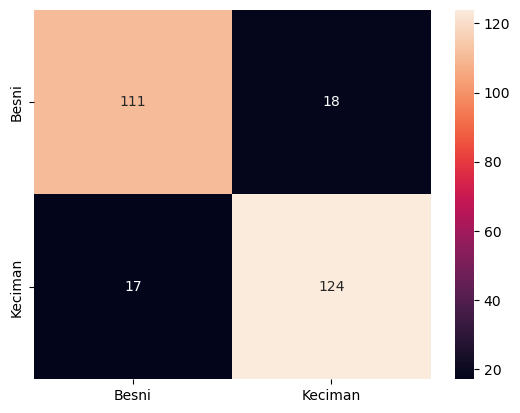

In [58]:
model_scaled_RBF=SVC(kernel='rbf')
model_scaled_RBF.fit(X_train_Scaler,y_train)
y_pred_scaled_RBF=model_scaled_RBF.predict(X_test_Scaler)
report_scaled_rbf=classification_report(y_test,y_pred_scaled_RBF)
print(report_scaled_rbf)
cm_scaled_rbf=confusion_matrix(y_test,y_pred_scaled_RBF)
cm_scaled_rbf
sns.heatmap(cm_scaled_rbf,xticklabels=['Besni','Keciman'],yticklabels=['Besni','Keciman'],annot=True,fmt='d')
plt.show()

In [60]:
model_scaled_RBF.n_iter_

array([316], dtype=int32)

In [62]:
###nof.of iterations  increased slightly and also performance

### Model Training AND Evaluation : With scaled data using Linear kernel

              precision    recall  f1-score   support

       Besni       0.85      0.88      0.86       129
     Kecimen       0.88      0.86      0.87       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



<Axes: >

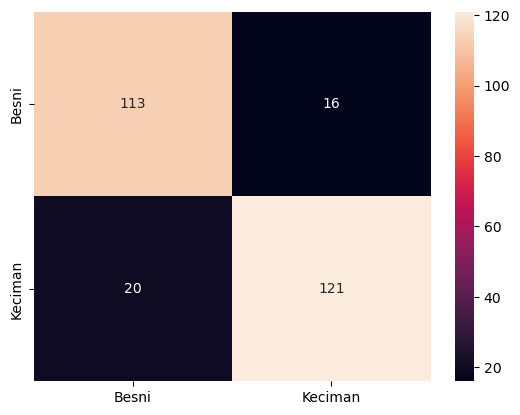

In [69]:
model_linear.fit(X_train_Scaler,y_train)
y_pred_Scaled_Linear=model_linear.predict(X_test_Scaler)
report_linear_Scaled=classification_report(y_test,y_pred_Scaled_Linear)
print(report_linear_Scaled)
cm_linear=confusion_matrix(y_test,y_pred_Scaled_Linear)
cm_linear
sns.heatmap(cm_linear,xticklabels=['Besni','Keciman'],yticklabels=['Besni','Keciman'],annot=True,fmt='d')

In [72]:
model_linear.n_iter_

array([734], dtype=int32)

In [75]:
### Model performance and no.of iterations decreased

### Writing same above code in pipeline

In [80]:
from sklearn.pipeline import Pipeline
pipe=Pipeline([
    ('Scale',StandardScaler()),
    ('SVC',SVC(kernel='rbf'))
    
])

              precision    recall  f1-score   support

       Besni       0.87      0.86      0.86       129
     Kecimen       0.87      0.88      0.88       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270

[[111  18]
 [ 17 124]]


<Axes: >

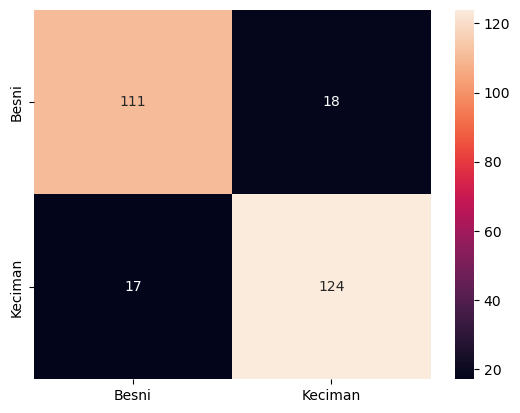

In [84]:
pipe.fit(X_train,y_train)
y_pred_pipe=pipe.predict(X_test)

report_pipe=classification_report(y_test,y_pred_pipe)
print(report_pipe)
cm_pipe=confusion_matrix(y_test,y_pred_pipe)
print(cm_pipe)
sns.heatmap(cm_pipe,xticklabels=['Besni','Keciman'],yticklabels=['Besni','Keciman'],annot=True,fmt='d')